In [138]:
import pandas as pd 
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [140]:
data=pd.read_csv("../placement.csv")

In [9]:
data.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [11]:
data.info

<bound method DataFrame.info of      cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]>

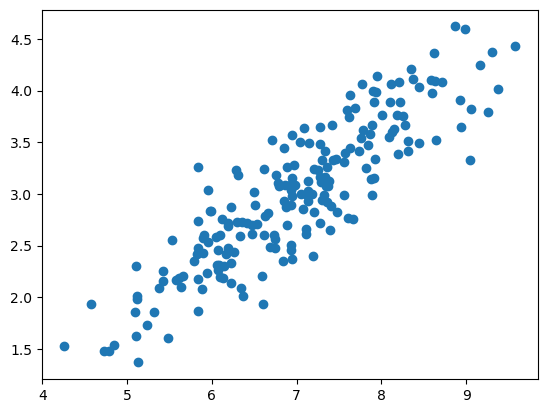

In [17]:
plt.scatter(data["cgpa"],data["package"],)

In [19]:
X=data['cgpa']

In [23]:
Y=data["package"]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

In [108]:
class LR:
    def fit(self, X,Y):
        n=len(X)
        if n!=len(Y):
            print("Illegal and unequal length x and y")
            return
        y_mean=Y.mean()
        x_mean=X.mean()
        # numinator=sum([(x[x]-x_mean)*(y[x]-y_mean) for x in range(size) ])
        # denominator=sum([(x[i]-x_mean)**2 for i in range(size)])
        # self.slope=numinator/denominator
        
        numerator = sum((X-x_mean)*(Y-y_mean))
        denominator = sum((X-x_mean) ** 2 )
    
        if denominator == 0:
            raise ValueError("Denominator is zero, cannot calculate slope.")
    
        # Slope (m)
        self.coeffiecient = numerator / denominator
        self.intercept=y_mean-self.coeffiecient*x_mean
        
        return self.coeffiecient,self.intercept


    def predict(self,X):
        return self.intercept+self.coeffiecient*X



In [110]:
lr=LR()

In [112]:
lr.fit(x_train,y_train)

(0.5663981154953569, -0.9705472919815552)

In [114]:
predicted=lr.predict(x_test)

In [142]:
print("MAE",mean_absolute_error(y_test,predicted))
print("MSE",mean_squared_error(y_test,predicted))
print("F1-Score",r2_score(y_test,predicted))

MAE 0.24848615150171466
MSE 0.09237621986190181
F1-Score 0.7886016127295006


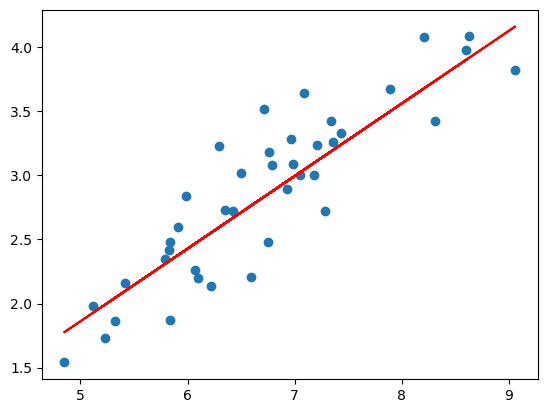

In [156]:
plt.scatter(x_test,y_test)
y_line=lr.intercept+lr.coeffiecient*x_test
plt.plot(x_test,y_line,color='red')

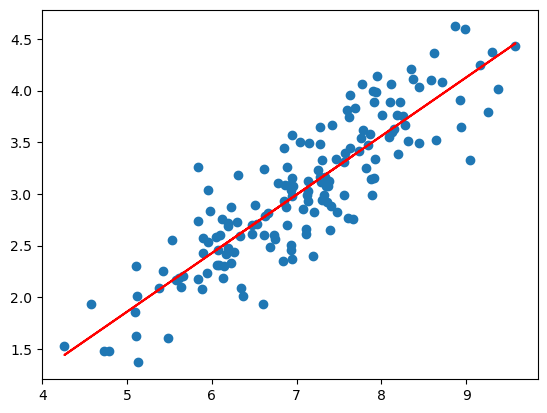

In [158]:
plt.scatter(x_train,y_train)
y_line=lr.intercept+lr.coeffiecient*x_train
plt.plot(x_train,y_line,color='red')

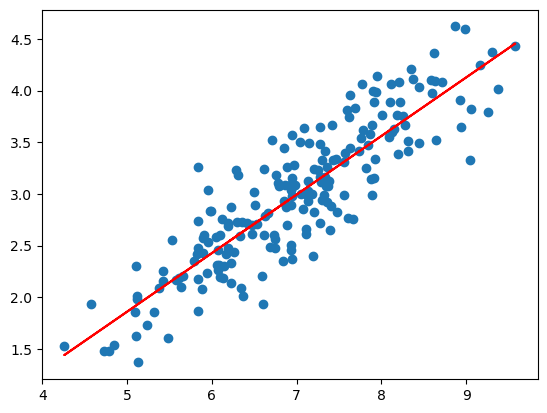

In [160]:
plt.scatter(X,Y)
y_line=lr.intercept+lr.coeffiecient*X
plt.plot(X,y_line,color='red')
